In [1]:
import os
from PIL import Image
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import KFold, StratifiedKFold
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import SGD
from keras import backend as K
from tensorflow.image import rgb_to_grayscale, grayscale_to_rgb
import numpy as np
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

In [2]:
image_height = 225
image_width = 240
batch_size = 32
epochs_numb = 10

# FIRST MODEL

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255)

validation_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        'NN_data/train',
        target_size=(image_height, image_width),
        batch_size=batch_size,
        class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
        'NN_data/val',
        target_size=(image_height, image_width),
        batch_size=batch_size,
        class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    'NN_data/test',
    target_size=(image_height,image_width),
    batch_size=batch_size,
    class_mode='binary')

epochs_numb = 50

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(image_height, image_width, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

hist4 = model.fit(
        train_generator,
        epochs=epochs_numb,
        validation_data=validation_generator
        )

Found 17434 images belonging to 2 classes.
Found 2179 images belonging to 2 classes.
Found 2181 images belonging to 2 classes.
Epoch 1/50
545/545 [==============================] - 259s 445ms/step - loss: 0.7334 - accuracy: 0.6606 - val_loss: 0.5856 - val_accuracy: 0.6934
Epoch 2/50
545/545 [==============================] - 238s 436ms/step - loss: 0.4855 - accuracy: 0.7692 - val_loss: 0.4742 - val_accuracy: 0.7866
Epoch 3/50
545/545 [==============================] - 239s 438ms/step - loss: 0.3826 - accuracy: 0.8365 - val_loss: 0.5373 - val_accuracy: 0.7834
Epoch 4/50
545/545 [==============================] - 239s 439ms/step - loss: 0.2799 - accuracy: 0.8842 - val_loss: 0.5404 - val_accuracy: 0.7618
Epoch 5/50
545/545 [==============================] - 239s 439ms/step - loss: 0.1791 - accuracy: 0.9325 - val_loss: 0.6535 - val_accuracy: 0.7760
Epoch 6/50
545/545 [==============================] - 240s 440ms/step - loss: 0.1102 - accuracy: 0.9615 - val_loss: 0.8782 - val_accuracy: 0.77

In [6]:
model.evaluate(test_generator)

69/69 [==============================] - 10s 147ms/step - loss: 4.9597 - accuracy: 0.7556


[4.959713935852051, 0.7556166648864746]

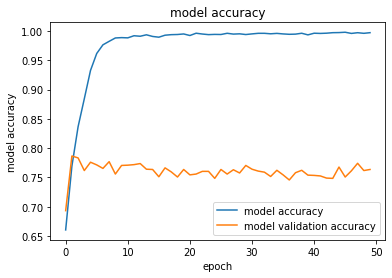

In [7]:
import matplotlib.pyplot as plt
plt.plot(hist4.history['accuracy'])
plt.plot(hist4.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['model accuracy', 'model validation accuracy'], loc='lower right')
plt.show()

# EPOCHS NUMBER ANALYSIS

In [3]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        'NN_data/train',
        target_size=(image_height, image_width),
        batch_size=batch_size,
        class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
        'NN_data/val',
        target_size=(image_height, image_width),
        batch_size=batch_size,
        class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    'NN_data/test',
    target_size=(image_height,image_width),
    batch_size=batch_size,
    class_mode='binary')

Found 17434 images belonging to 2 classes.
Found 2179 images belonging to 2 classes.
Found 2181 images belonging to 2 classes.


In [4]:
train_generator.class_indices

{'Cats_resized': 0, 'Dogs_resized': 1}

In [5]:
trainig_size = train_generator.samples
validation_size = validation_generator.samples
test_size = test_generator.samples
trainig_size, validation_size, test_size

(17434, 2179, 2181)

In [7]:
epochs_numb = 10

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(image_height, image_width, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.50))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

hist1 = model.fit(
        train_generator,
        steps_per_epoch=trainig_size // batch_size,
        epochs=epochs_numb,
        validation_data=validation_generator,
        validation_steps=validation_size // batch_size)

model.save('model1')

Epoch 1/10
544/544 [==============================] - 237s 435ms/step - loss: 0.7010 - accuracy: 0.6353 - val_loss: 0.5330 - val_accuracy: 0.7353
Epoch 2/10
544/544 [==============================] - 236s 434ms/step - loss: 0.5847 - accuracy: 0.7058 - val_loss: 0.5507 - val_accuracy: 0.7390
Epoch 3/10
544/544 [==============================] - 236s 434ms/step - loss: 0.5412 - accuracy: 0.7388 - val_loss: 0.4857 - val_accuracy: 0.7656
Epoch 4/10
544/544 [==============================] - 236s 434ms/step - loss: 0.5248 - accuracy: 0.7538 - val_loss: 0.4776 - val_accuracy: 0.7771
Epoch 5/10
544/544 [==============================] - 236s 434ms/step - loss: 0.5056 - accuracy: 0.7613 - val_loss: 0.4546 - val_accuracy: 0.7854
Epoch 6/10
544/544 [==============================] - 236s 434ms/step - loss: 0.5008 - accuracy: 0.7677 - val_loss: 0.4827 - val_accuracy: 0.7767
Epoch 7/10
544/544 [==============================] - 237s 435ms/step - loss: 0.4900 - accuracy: 0.7762 - val_loss: 0.5669 -

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


In [8]:
epochs_numb = 15

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(image_height, image_width, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.50))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

hist2 = model.fit(
        train_generator,
        steps_per_epoch=trainig_size // batch_size,
        epochs=epochs_numb,
        validation_data=validation_generator,
        validation_steps=validation_size // batch_size)

model.save('model2')

Epoch 1/15
544/544 [==============================] - 237s 434ms/step - loss: 0.7836 - accuracy: 0.6387 - val_loss: 0.5422 - val_accuracy: 0.7206
Epoch 2/15
544/544 [==============================] - 236s 434ms/step - loss: 0.5861 - accuracy: 0.7041 - val_loss: 0.4974 - val_accuracy: 0.7587
Epoch 3/15
544/544 [==============================] - 237s 435ms/step - loss: 0.5541 - accuracy: 0.7325 - val_loss: 0.4688 - val_accuracy: 0.7969
Epoch 4/15
544/544 [==============================] - 236s 434ms/step - loss: 0.5365 - accuracy: 0.7451 - val_loss: 0.4763 - val_accuracy: 0.7725
Epoch 5/15
544/544 [==============================] - 237s 434ms/step - loss: 0.5220 - accuracy: 0.7547 - val_loss: 0.5010 - val_accuracy: 0.7725
Epoch 6/15
544/544 [==============================] - 237s 434ms/step - loss: 0.5179 - accuracy: 0.7568 - val_loss: 0.4601 - val_accuracy: 0.7900
Epoch 7/15
544/544 [==============================] - 237s 435ms/step - loss: 0.5072 - accuracy: 0.7641 - val_loss: 0.4700 -

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


In [9]:
epochs_numb = 30

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(image_height, image_width, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.50))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

hist3 = model.fit(
        train_generator,
        steps_per_epoch=trainig_size // batch_size,
        epochs=epochs_numb,
        validation_data=validation_generator,
        validation_steps=validation_size // batch_size)

model.save('model3')

Epoch 1/30
544/544 [==============================] - 237s 435ms/step - loss: 0.6807 - accuracy: 0.6420 - val_loss: 0.5517 - val_accuracy: 0.7293
Epoch 2/30
544/544 [==============================] - 237s 435ms/step - loss: 0.5783 - accuracy: 0.7137 - val_loss: 0.5269 - val_accuracy: 0.7325
Epoch 3/30
544/544 [==============================] - 237s 435ms/step - loss: 0.5495 - accuracy: 0.7377 - val_loss: 0.4850 - val_accuracy: 0.7780
Epoch 4/30
544/544 [==============================] - 238s 437ms/step - loss: 0.5427 - accuracy: 0.7415 - val_loss: 0.4669 - val_accuracy: 0.7932
Epoch 5/30
544/544 [==============================] - 238s 436ms/step - loss: 0.5228 - accuracy: 0.7542 - val_loss: 0.4916 - val_accuracy: 0.7734
Epoch 6/30
544/544 [==============================] - 238s 436ms/step - loss: 0.5126 - accuracy: 0.7619 - val_loss: 0.4586 - val_accuracy: 0.7895
Epoch 7/30
544/544 [==============================] - 238s 436ms/step - loss: 0.5045 - accuracy: 0.7690 - val_loss: 0.4523 -

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


In [26]:
prova_hist1 = hist1

for key in list(hist1.history.keys()):
    for i in range(len(hist3.history[key]) - len(hist1.history[key])):
        prova_hist1.history[key].append(hist1.history[key][-1])

[0.7010180950164795, 0.5846868753433228, 0.5412487387657166, 0.5247811079025269, 0.5056321024894714, 0.5007997155189514, 0.4900093376636505, 0.4909004271030426, 0.4783379137516022, 0.4683386981487274, 0.4683386981487274, 0.4683386981487274, 0.4683386981487274, 0.4683386981487274, 0.4683386981487274, 0.4683386981487274, 0.4683386981487274, 0.4683386981487274, 0.4683386981487274, 0.4683386981487274, 0.4683386981487274, 0.4683386981487274, 0.4683386981487274, 0.4683386981487274, 0.4683386981487274, 0.4683386981487274, 0.4683386981487274, 0.4683386981487274, 0.4683386981487274, 0.4683386981487274] loss
[0.6352717876434326, 0.7058383822441101, 0.7388231158256531, 0.7538213729858398, 0.7612918019294739, 0.7676703929901123, 0.7762326002120972, 0.7783588171005249, 0.7853695154190063, 0.7893919944763184, 0.7893919944763184, 0.7893919944763184, 0.7893919944763184, 0.7893919944763184, 0.7893919944763184, 0.7893919944763184, 0.7893919944763184, 0.7893919944763184, 0.7893919944763184, 0.78939199447

In [30]:
prova_hist2 = hist2

for key in list(hist2.history.keys()):
    for i in range(len(hist3.history[key]) - len(hist2.history[key])):
        prova_hist2.history[key].append(hist2.history[key][-1])
    print(prova_hist2.history[key], key)

[0.7835617065429688, 0.5860562920570374, 0.5540636777877808, 0.5365126132965088, 0.5219827890396118, 0.5178827047348022, 0.5072101950645447, 0.4998089075088501, 0.48956891894340515, 0.49182912707328796, 0.4841204583644867, 0.4760281443595886, 0.4758475720882416, 0.4745345711708069, 0.478745698928833, 0.478745698928833, 0.478745698928833, 0.478745698928833, 0.478745698928833, 0.478745698928833, 0.478745698928833, 0.478745698928833, 0.478745698928833, 0.478745698928833, 0.478745698928833, 0.478745698928833, 0.478745698928833, 0.478745698928833, 0.478745698928833, 0.478745698928833] loss
[0.6386622190475464, 0.7041144967079163, 0.7325019836425781, 0.745144248008728, 0.7546833753585815, 0.7568095326423645, 0.7641075849533081, 0.7675554752349854, 0.7750258445739746, 0.7700839042663574, 0.7784162759780884, 0.7861739993095398, 0.7872083783149719, 0.7876681089401245, 0.7880128622055054, 0.7880128622055054, 0.7880128622055054, 0.7880128622055054, 0.7880128622055054, 0.7880128622055054, 0.788012

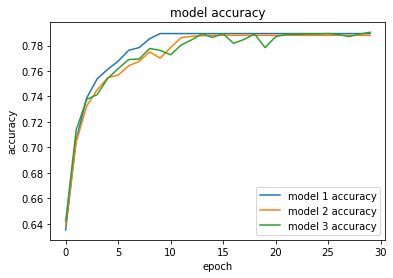

In [31]:
import matplotlib.pyplot as plt
plt.plot(prova_hist1.history['accuracy'])
plt.plot(hist2.history['accuracy'])
plt.plot(hist3.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['model 1 accuracy', 'model 2 accuracy', 'model 3 accuracy'], loc='lower right')
plt.show()

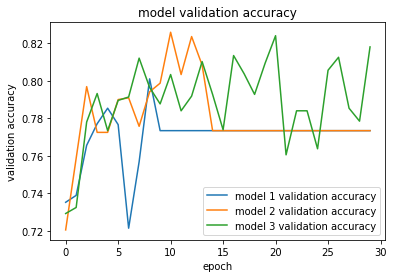

In [32]:
import matplotlib.pyplot as plt
plt.plot(prova_hist1.history['val_accuracy'])
plt.plot(hist2.history['val_accuracy'])
plt.plot(hist3.history['val_accuracy'])
plt.title('model validation accuracy')
plt.ylabel('validation accuracy')
plt.xlabel('epoch')
plt.legend(['model 1 validation accuracy', 'model 2 validation accuracy', 'model 3 validation accuracy'], loc='lower right')
plt.show()

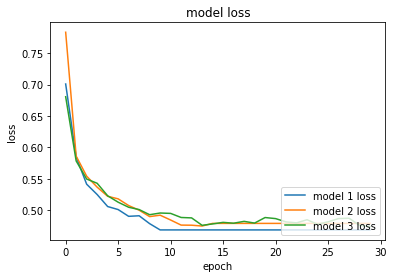

In [33]:
import matplotlib.pyplot as plt
plt.plot(prova_hist1.history['loss'])
plt.plot(hist2.history['loss'])
plt.plot(hist3.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['model 1 loss', 'model 2 loss', 'model 3 loss'], loc='lower right')
plt.show()

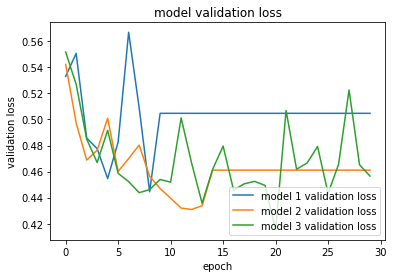

In [34]:
import matplotlib.pyplot as plt
plt.plot(prova_hist1.history['val_loss'])
plt.plot(hist2.history['val_loss'])
plt.plot(hist3.history['val_loss'])
plt.title('model validation loss')
plt.ylabel('validation loss')
plt.xlabel('epoch')
plt.legend(['model 1 validation loss', 'model 2 validation loss', 'model 3 validation loss'], loc='lower right')
plt.show()

# BATCH OPTIMIZATION

In [6]:
epochs_numb = 15
batch_size = 16

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        'NN_data/train',
        target_size=(image_height, image_width),
        batch_size=batch_size,
        class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
        'NN_data/val',
        target_size=(image_height, image_width),
        batch_size=batch_size,
        class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    'NN_data/test',
    target_size=(image_height,image_width),
    batch_size=batch_size,
    class_mode='binary')

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(image_height, image_width, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.50))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

hist1 = model.fit(
        train_generator,
        steps_per_epoch=trainig_size // batch_size,
        epochs=epochs_numb,
        validation_data=validation_generator,
        validation_steps=validation_size // batch_size)

model.save('model1_batch')

Epoch 1/15
1089/1089 [==============================] - 210s 187ms/step - loss: 0.8441 - accuracy: 0.6197 - val_loss: 0.6390 - val_accuracy: 0.6641


INFO:tensorflow:Assets written to: model1_batch/assets


INFO:tensorflow:Assets written to: model1_batch/assets


In [7]:
epochs_numb = 15
batch_size = 32

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        'NN_data/train',
        target_size=(image_height, image_width),
        batch_size=batch_size,
        class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
        'NN_data/val',
        target_size=(image_height, image_width),
        batch_size=batch_size,
        class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    'NN_data/test',
    target_size=(image_height,image_width),
    batch_size=batch_size,
    class_mode='binary')

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(image_height, image_width, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.50))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

hist2 = model.fit(
        train_generator,
        steps_per_epoch=trainig_size // batch_size,
        epochs=epochs_numb,
        validation_data=validation_generator,
        validation_steps=validation_size // batch_size)

model.save('model2_batch')

Epoch 1/15
544/544 [==============================] - 170s 312ms/step - loss: 0.7625 - accuracy: 0.6214 - val_loss: 0.5924 - val_accuracy: 0.6792
Epoch 2/15
544/544 [==============================] - 169s 311ms/step - loss: 0.6020 - accuracy: 0.6922 - val_loss: 0.5159 - val_accuracy: 0.7449
Epoch 3/15
544/544 [==============================] - 171s 315ms/step - loss: 0.5924 - accuracy: 0.7127 - val_loss: 0.5034 - val_accuracy: 0.7597
Epoch 4/15
544/544 [==============================] - 170s 312ms/step - loss: 0.5579 - accuracy: 0.7316 - val_loss: 0.4860 - val_accuracy: 0.7835
Epoch 5/15
544/544 [==============================] - 171s 315ms/step - loss: 0.5459 - accuracy: 0.7458 - val_loss: 0.4910 - val_accuracy: 0.7739
Epoch 6/15
544/544 [==============================] - 170s 312ms/step - loss: 0.5309 - accuracy: 0.7558 - val_loss: 0.4843 - val_accuracy: 0.7725
Epoch 7/15
544/544 [==============================] - 170s 312ms/step - loss: 0.5252 - accuracy: 0.7547 - val_loss: 0.4687 -

INFO:tensorflow:Assets written to: model2_batch/assets


INFO:tensorflow:Assets written to: model2_batch/assets


In [8]:
epochs_numb = 15
batch_size = 64

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        'NN_data/train',
        target_size=(image_height, image_width),
        batch_size=batch_size,
        class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
        'NN_data/val',
        target_size=(image_height, image_width),
        batch_size=batch_size,
        class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    'NN_data/test',
    target_size=(image_height,image_width),
    batch_size=batch_size,
    class_mode='binary')

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(image_height, image_width, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.50))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

hist3 = model.fit(
        train_generator,
        steps_per_epoch=trainig_size // batch_size,
        epochs=epochs_numb,
        validation_data=validation_generator,
        validation_steps=validation_size // batch_size)

model.save('model3_batch')

Epoch 1/15
272/272 [==============================] - 86s 314ms/step - loss: 0.7625 - accuracy: 0.6099 - val_loss: 0.6016 - val_accuracy: 0.6471
Epoch 2/15
272/272 [==============================] - 87s 319ms/step - loss: 0.6378 - accuracy: 0.6679 - val_loss: 0.6456 - val_accuracy: 0.6756
Epoch 3/15
272/272 [==============================] - 86s 315ms/step - loss: 0.6039 - accuracy: 0.6929 - val_loss: 0.5193 - val_accuracy: 0.7445
Epoch 4/15
272/272 [==============================] - 85s 314ms/step - loss: 0.5830 - accuracy: 0.7107 - val_loss: 0.5392 - val_accuracy: 0.7335
Epoch 5/15
272/272 [==============================] - 85s 313ms/step - loss: 0.5547 - accuracy: 0.7280 - val_loss: 0.5497 - val_accuracy: 0.7252
Epoch 6/15
272/272 [==============================] - 85s 314ms/step - loss: 0.5440 - accuracy: 0.7359 - val_loss: 0.4758 - val_accuracy: 0.7748
Epoch 7/15
272/272 [==============================] - 86s 314ms/step - loss: 0.5324 - accuracy: 0.7472 - val_loss: 0.4999 - val_ac

INFO:tensorflow:Assets written to: model3_batch/assets


INFO:tensorflow:Assets written to: model3_batch/assets


In [9]:
epochs_numb = 15
batch_size = 128

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        'NN_data/train',
        target_size=(image_height, image_width),
        batch_size=batch_size,
        class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
        'NN_data/val',
        target_size=(image_height, image_width),
        batch_size=batch_size,
        class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    'NN_data/test',
    target_size=(image_height,image_width),
    batch_size=batch_size,
    class_mode='binary')

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(image_height, image_width, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.50))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

hist4 = model.fit(
        train_generator,
        steps_per_epoch=trainig_size // batch_size,
        epochs=epochs_numb,
        validation_data=validation_generator,
        validation_steps=validation_size // batch_size)

model.save('model4_batch')

Epoch 1/15
136/136 [==============================] - 47s 342ms/step - loss: 1.2685 - accuracy: 0.5761 - val_loss: 0.6278 - val_accuracy: 0.6618
Epoch 2/15
136/136 [==============================] - 46s 337ms/step - loss: 0.6803 - accuracy: 0.6294 - val_loss: 0.6277 - val_accuracy: 0.6544
Epoch 3/15
136/136 [==============================] - 46s 338ms/step - loss: 0.6479 - accuracy: 0.6574 - val_loss: 0.5932 - val_accuracy: 0.6967
Epoch 4/15
136/136 [==============================] - 46s 336ms/step - loss: 0.6155 - accuracy: 0.6760 - val_loss: 0.5660 - val_accuracy: 0.7151
Epoch 5/15
136/136 [==============================] - 46s 337ms/step - loss: 0.6086 - accuracy: 0.6795 - val_loss: 0.5576 - val_accuracy: 0.7114
Epoch 6/15
136/136 [==============================] - 47s 344ms/step - loss: 0.6011 - accuracy: 0.6974 - val_loss: 0.5799 - val_accuracy: 0.7224
Epoch 7/15
136/136 [==============================] - 47s 346ms/step - loss: 0.5906 - accuracy: 0.6956 - val_loss: 0.5132 - val_ac

INFO:tensorflow:Assets written to: model4_batch/assets


INFO:tensorflow:Assets written to: model4_batch/assets


In [16]:
epochs_numb = 15
batch_size = 256

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        'NN_data/train',
        target_size=(image_height, image_width),
        batch_size=batch_size,
        class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
        'NN_data/val',
        target_size=(image_height, image_width),
        batch_size=batch_size,
        class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    'NN_data/test',
    target_size=(image_height,image_width),
    batch_size=batch_size,
    class_mode='binary')

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(image_height, image_width, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.50))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

hist5 = model.fit(
        train_generator,
        steps_per_epoch=trainig_size // batch_size,
        epochs=epochs_numb,
        validation_data=validation_generator,
        validation_steps=validation_size // batch_size)

model.save('model5_batch')

Epoch 1/15
68/68 [==============================] - 29s 419ms/step - loss: 1.4822 - accuracy: 0.5257 - val_loss: 0.6953 - val_accuracy: 0.5195
Epoch 2/15
68/68 [==============================] - 27s 393ms/step - loss: 0.7080 - accuracy: 0.5657 - val_loss: 0.6530 - val_accuracy: 0.6133
Epoch 3/15
68/68 [==============================] - 27s 399ms/step - loss: 0.6863 - accuracy: 0.5855 - val_loss: 0.6554 - val_accuracy: 0.6641
Epoch 4/15
68/68 [==============================] - 28s 411ms/step - loss: 0.6627 - accuracy: 0.6259 - val_loss: 0.6151 - val_accuracy: 0.6211
Epoch 5/15
68/68 [==============================] - 26s 380ms/step - loss: 0.6510 - accuracy: 0.6406 - val_loss: 0.5809 - val_accuracy: 0.7305
Epoch 6/15
68/68 [==============================] - 26s 379ms/step - loss: 0.6120 - accuracy: 0.6788 - val_loss: 0.6656 - val_accuracy: 0.6445
Epoch 7/15
68/68 [==============================] - 24s 360ms/step - loss: 0.6269 - accuracy: 0.6627 - val_loss: 0.5561 - val_accuracy: 0.6992

INFO:tensorflow:Assets written to: model5_batch/assets


INFO:tensorflow:Assets written to: model5_batch/assets


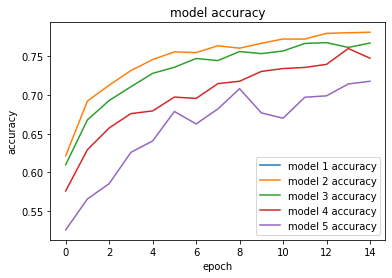

In [17]:
import matplotlib.pyplot as plt
plt.plot(hist1.history['accuracy'])
plt.plot(hist2.history['accuracy'])
plt.plot(hist3.history['accuracy'])
plt.plot(hist4.history['accuracy'])
plt.plot(hist5.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['model 1 accuracy', 'model 2 accuracy', 'model 3 accuracy', 'model 4 accuracy', 'model 5 accuracy'], loc='lower right')
plt.show()

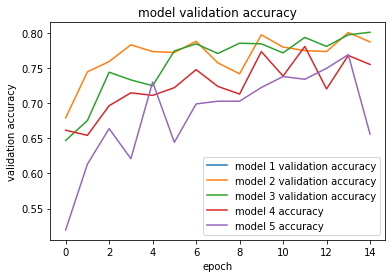

In [18]:
import matplotlib.pyplot as plt
plt.plot(hist1.history['val_accuracy'])
plt.plot(hist2.history['val_accuracy'])
plt.plot(hist3.history['val_accuracy'])
plt.plot(hist4.history['val_accuracy'])
plt.plot(hist5.history['val_accuracy'])
plt.title('model validation accuracy')
plt.ylabel('validation accuracy')
plt.xlabel('epoch')
plt.legend(['model 1 validation accuracy', 'model 2 validation accuracy', 'model 3 validation accuracy', 'model 4 accuracy', 'model 5 accuracy'], loc='lower right')
plt.show()

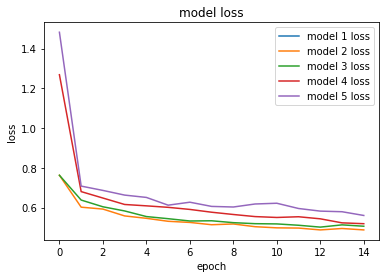

In [19]:
import matplotlib.pyplot as plt
plt.plot(hist1.history['loss'])
plt.plot(hist2.history['loss'])
plt.plot(hist3.history['loss'])
plt.plot(hist4.history['loss'])
plt.plot(hist5.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['model 1 loss', 'model 2 loss', 'model 3 loss', 'model 4 loss', 'model 5 loss'], loc='upper right')
plt.show()

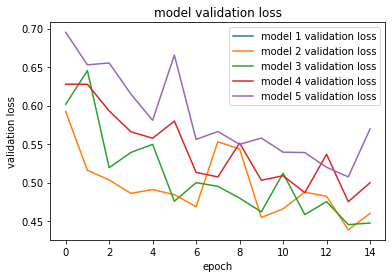

In [20]:
import matplotlib.pyplot as plt
plt.plot(hist1.history['val_loss'])
plt.plot(hist2.history['val_loss'])
plt.plot(hist3.history['val_loss'])
plt.plot(hist4.history['val_loss'])
plt.plot(hist5.history['val_loss'])
plt.title('model validation loss')
plt.ylabel('validation loss')
plt.xlabel('epoch')
plt.legend(['model 1 validation loss', 'model 2 validation loss', 'model 3 validation loss', 'model 4 validation loss', 'model 5 validation loss'], loc='upper right')
plt.show()

# CON2D INVERTITI

In [6]:
epochs_numb = 15

model = Sequential()
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), input_shape=(image_height, image_width, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.50))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

hist1 = model.fit(
        train_generator,
        epochs=epochs_numb,
        validation_data=validation_generator)

Epoch 1/15
545/545 [==============================] - 322s 584ms/step - loss: 0.7194 - accuracy: 0.6141 - val_loss: 0.6435 - val_accuracy: 0.6544
Epoch 2/15
545/545 [==============================] - 300s 551ms/step - loss: 0.6075 - accuracy: 0.6884 - val_loss: 0.5117 - val_accuracy: 0.7458
Epoch 3/15
545/545 [==============================] - 301s 551ms/step - loss: 0.5725 - accuracy: 0.7147 - val_loss: 0.4786 - val_accuracy: 0.7715
Epoch 4/15
545/545 [==============================] - 301s 552ms/step - loss: 0.5561 - accuracy: 0.7293 - val_loss: 0.4888 - val_accuracy: 0.7825
Epoch 5/15
545/545 [==============================] - 301s 552ms/step - loss: 0.5319 - accuracy: 0.7477 - val_loss: 0.4822 - val_accuracy: 0.7806
Epoch 6/15
545/545 [==============================] - 301s 551ms/step - loss: 0.5189 - accuracy: 0.7546 - val_loss: 0.4542 - val_accuracy: 0.7907
Epoch 7/15
545/545 [==============================] - 301s 552ms/step - loss: 0.5155 - accuracy: 0.7609 - val_loss: 0.4811 -

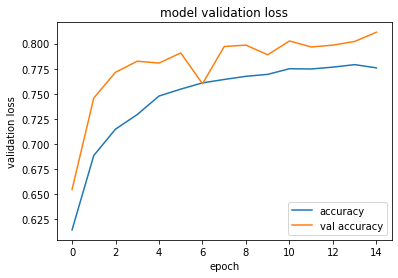

In [7]:
import matplotlib.pyplot as plt
plt.plot(hist1.history['accuracy'])
plt.plot(hist1.history['val_accuracy'])
plt.title('model validation loss')
plt.ylabel('validation loss')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val accuracy'], loc='lower right')
plt.show()

In [8]:
epochs_numb = 15

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(image_height, image_width, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.50))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

hist2 = model.fit(
        train_generator,
        epochs=epochs_numb,
        validation_data=validation_generator)

Epoch 1/15
545/545 [==============================] - 244s 441ms/step - loss: 0.6829 - accuracy: 0.6413 - val_loss: 0.5980 - val_accuracy: 0.7012
Epoch 2/15
545/545 [==============================] - 237s 434ms/step - loss: 0.5785 - accuracy: 0.7156 - val_loss: 0.5093 - val_accuracy: 0.7503
Epoch 3/15
545/545 [==============================] - 237s 434ms/step - loss: 0.5378 - accuracy: 0.7418 - val_loss: 0.4877 - val_accuracy: 0.7673
Epoch 4/15
545/545 [==============================] - 237s 435ms/step - loss: 0.5241 - accuracy: 0.7548 - val_loss: 0.5101 - val_accuracy: 0.7430
Epoch 5/15
545/545 [==============================] - 238s 436ms/step - loss: 0.5232 - accuracy: 0.7541 - val_loss: 0.4786 - val_accuracy: 0.7669
Epoch 6/15
545/545 [==============================] - 263s 482ms/step - loss: 0.5169 - accuracy: 0.7588 - val_loss: 0.4604 - val_accuracy: 0.7967
Epoch 7/15
545/545 [==============================] - 238s 436ms/step - loss: 0.5028 - accuracy: 0.7659 - val_loss: 0.4471 -

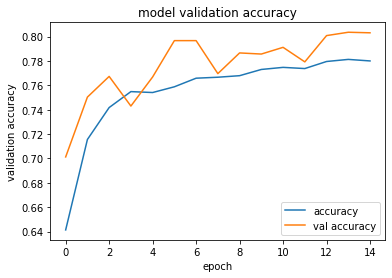

In [11]:
import matplotlib.pyplot as plt
plt.plot(hist2.history['accuracy'])
plt.plot(hist2.history['val_accuracy'])
plt.title('model validation accuracy')
plt.ylabel('validation accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val accuracy'], loc='lower right')
plt.show()

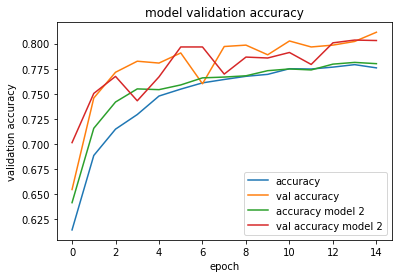

In [12]:
import matplotlib.pyplot as plt
plt.plot(hist1.history['accuracy'])
plt.plot(hist1.history['val_accuracy'])
plt.plot(hist2.history['accuracy'])
plt.plot(hist2.history['val_accuracy'])
plt.title('model validation accuracy')
plt.ylabel('validation accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val accuracy', 'accuracy model 2', 'val accuracy model 2'], loc='lower right')
plt.show()

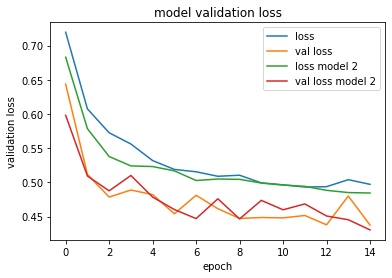

In [14]:
import matplotlib.pyplot as plt
plt.plot(hist1.history['loss'])
plt.plot(hist1.history['val_loss'])
plt.plot(hist2.history['loss'])
plt.plot(hist2.history['val_loss'])
plt.title('model validation loss')
plt.ylabel('validation loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val loss', 'loss model 2', 'val loss model 2'], loc='upper right')
plt.show()

In [6]:
epochs_numb = 15

model = Sequential()
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), input_shape=(image_height, image_width, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.50))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

hist3 = model.fit(
        train_generator,
        epochs=epochs_numb,
        validation_data=validation_generator)

Epoch 1/15
545/545 [==============================] - 209s 380ms/step - loss: 0.6770 - accuracy: 0.5984 - val_loss: 0.5634 - val_accuracy: 0.7077
Epoch 2/15
545/545 [==============================] - 176s 322ms/step - loss: 0.5729 - accuracy: 0.7116 - val_loss: 0.5641 - val_accuracy: 0.7242
Epoch 3/15
545/545 [==============================] - 177s 325ms/step - loss: 0.5177 - accuracy: 0.7520 - val_loss: 0.4505 - val_accuracy: 0.7829
Epoch 4/15
545/545 [==============================] - 176s 323ms/step - loss: 0.4985 - accuracy: 0.7701 - val_loss: 0.4386 - val_accuracy: 0.7921
Epoch 5/15
545/545 [==============================] - 176s 323ms/step - loss: 0.4857 - accuracy: 0.7826 - val_loss: 0.4382 - val_accuracy: 0.8050
Epoch 6/15
545/545 [==============================] - 175s 320ms/step - loss: 0.4693 - accuracy: 0.7933 - val_loss: 0.4457 - val_accuracy: 0.7990
Epoch 7/15
545/545 [==============================] - 175s 321ms/step - loss: 0.4600 - accuracy: 0.7961 - val_loss: 0.5102 -

In [7]:
print(hist3.history['accuracy'])
print(hist3.history['val_accuracy'])
print(hist3.history['loss'])
print(hist3.history['val_loss'])

[0.5984283685684204, 0.7115980386734009, 0.751978874206543, 0.7701044082641602, 0.7825513482093811, 0.7933348417282104, 0.7961454391479492, 0.8049213886260986, 0.8092806935310364, 0.8168521523475647, 0.8154181241989136, 0.8188596963882446, 0.8200642466545105, 0.8230469226837158, 0.8273488879203796]
[0.7076640725135803, 0.7241854071617126, 0.782927930355072, 0.7921064496040344, 0.8049563765525818, 0.7989903688430786, 0.7820100784301758, 0.7966957092285156, 0.829738438129425, 0.8292794823646545, 0.8173474073410034, 0.805874228477478, 0.8251491785049438, 0.829738438129425, 0.8458008170127869]
[0.6770086884498596, 0.5729029774665833, 0.5176835656166077, 0.498465359210968, 0.4856696128845215, 0.46929463744163513, 0.46000829339027405, 0.4508325159549713, 0.44104066491127014, 0.4284173250198364, 0.429189532995224, 0.4221439063549042, 0.4211670756340027, 0.4160250425338745, 0.41329044103622437]
[0.5633597373962402, 0.5640727877616882, 0.45047473907470703, 0.43857043981552124, 0.438162684440612

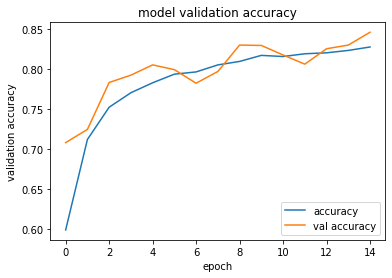

In [8]:
import matplotlib.pyplot as plt
plt.plot(hist3.history['accuracy'])
plt.plot(hist3.history['val_accuracy'])
plt.title('model validation accuracy')
plt.ylabel('validation accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val accuracy'], loc='lower right')
plt.show()

In [10]:
epochs_numb = 15

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(image_height, image_width, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.50))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

hist4 = model.fit(
        train_generator,
        epochs=epochs_numb,
        validation_data=validation_generator)

Epoch 1/15
545/545 [==============================] - 179s 326ms/step - loss: 0.6453 - accuracy: 0.6335 - val_loss: 0.5488 - val_accuracy: 0.7164
Epoch 2/15
545/545 [==============================] - 178s 327ms/step - loss: 0.5456 - accuracy: 0.7315 - val_loss: 0.4919 - val_accuracy: 0.7724
Epoch 3/15
545/545 [==============================] - 179s 327ms/step - loss: 0.5049 - accuracy: 0.7639 - val_loss: 0.5597 - val_accuracy: 0.7393
Epoch 4/15
545/545 [==============================] - 178s 327ms/step - loss: 0.4793 - accuracy: 0.7784 - val_loss: 0.4767 - val_accuracy: 0.7820
Epoch 5/15
545/545 [==============================] - 176s 323ms/step - loss: 0.4705 - accuracy: 0.7860 - val_loss: 0.4268 - val_accuracy: 0.8100
Epoch 6/15
545/545 [==============================] - 177s 325ms/step - loss: 0.4556 - accuracy: 0.7973 - val_loss: 0.4616 - val_accuracy: 0.8196
Epoch 7/15
545/545 [==============================] - 182s 333ms/step - loss: 0.4427 - accuracy: 0.8056 - val_loss: 0.4051 -

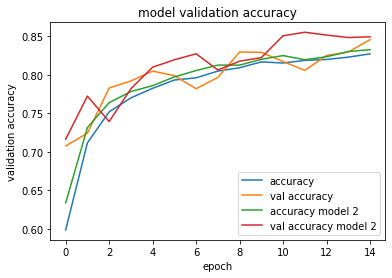

In [11]:
import matplotlib.pyplot as plt
plt.plot(hist3.history['accuracy'])
plt.plot(hist3.history['val_accuracy'])
plt.plot(hist4.history['accuracy'])
plt.plot(hist4.history['val_accuracy'])
plt.title('model validation accuracy')
plt.ylabel('validation accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val accuracy', 'accuracy model 2', 'val accuracy model 2'], loc='lower right')
plt.show()

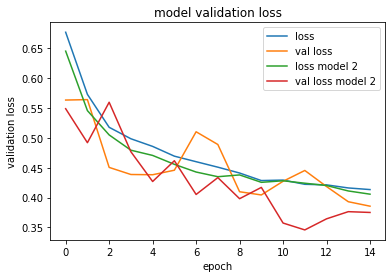

In [12]:
import matplotlib.pyplot as plt
plt.plot(hist3.history['loss'])
plt.plot(hist3.history['val_loss'])
plt.plot(hist4.history['loss'])
plt.plot(hist4.history['val_loss'])
plt.title('model validation loss')
plt.ylabel('validation loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val loss', 'loss model 2', 'val loss model 2'], loc='upper right')
plt.show()

# FILTERS MAX NUMBER

In [6]:
epochs_numb = 15

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(image_height, image_width, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.50))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

hist1 = model.fit(
        train_generator,
        epochs=epochs_numb,
        validation_data=validation_generator)

Epoch 1/15
545/545 [==============================] - 279s 502ms/step - loss: 0.6549 - accuracy: 0.6268 - val_loss: 0.5471 - val_accuracy: 0.7008
Epoch 2/15
545/545 [==============================] - 227s 416ms/step - loss: 0.5498 - accuracy: 0.7255 - val_loss: 0.5199 - val_accuracy: 0.7361
Epoch 3/15
545/545 [==============================] - 228s 418ms/step - loss: 0.5067 - accuracy: 0.7594 - val_loss: 0.4398 - val_accuracy: 0.8022
Epoch 4/15
545/545 [==============================] - 227s 416ms/step - loss: 0.4823 - accuracy: 0.7801 - val_loss: 0.4234 - val_accuracy: 0.8219
Epoch 5/15
545/545 [==============================] - 225s 413ms/step - loss: 0.4594 - accuracy: 0.7918 - val_loss: 0.4777 - val_accuracy: 0.7816
Epoch 6/15
545/545 [==============================] - 227s 416ms/step - loss: 0.4412 - accuracy: 0.8013 - val_loss: 0.4268 - val_accuracy: 0.8215
Epoch 7/15
545/545 [==============================] - 227s 417ms/step - loss: 0.4304 - accuracy: 0.8129 - val_loss: 0.4555 -

In [7]:
epochs_numb = 15

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(image_height, image_width, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(512, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(1024, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.50))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

hist2 = model.fit(
        train_generator,
        epochs=epochs_numb,
        validation_data=validation_generator)

Epoch 1/15
545/545 [==============================] - 230s 419ms/step - loss: 0.6863 - accuracy: 0.5721 - val_loss: 0.6346 - val_accuracy: 0.6599
Epoch 2/15
545/545 [==============================] - 227s 416ms/step - loss: 0.6219 - accuracy: 0.6677 - val_loss: 0.5898 - val_accuracy: 0.6888
Epoch 3/15
545/545 [==============================] - 227s 416ms/step - loss: 0.5708 - accuracy: 0.7317 - val_loss: 0.4860 - val_accuracy: 0.7448
Epoch 4/15
545/545 [==============================] - 228s 418ms/step - loss: 0.4773 - accuracy: 0.7843 - val_loss: 0.4064 - val_accuracy: 0.8201
Epoch 5/15
545/545 [==============================] - 227s 417ms/step - loss: 0.4371 - accuracy: 0.8100 - val_loss: 0.3976 - val_accuracy: 0.8256
Epoch 6/15
545/545 [==============================] - 226s 414ms/step - loss: 0.4108 - accuracy: 0.8291 - val_loss: 0.3411 - val_accuracy: 0.8642
Epoch 7/15
545/545 [==============================] - 226s 414ms/step - loss: 0.4085 - accuracy: 0.8279 - val_loss: 0.5113 -

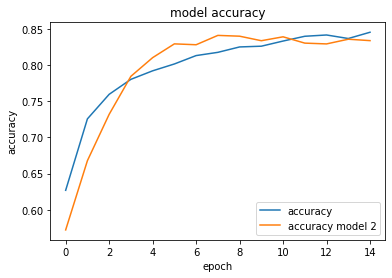

In [8]:
import matplotlib.pyplot as plt
plt.plot(hist1.history['accuracy'])
plt.plot(hist2.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'accuracy model 2'], loc='lower right')
plt.show()

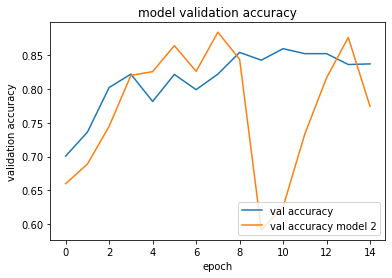

In [9]:
plt.plot(hist1.history['val_accuracy'])
plt.plot(hist2.history['val_accuracy'])
plt.title('model validation accuracy')
plt.ylabel('validation accuracy')
plt.xlabel('epoch')
plt.legend(['val accuracy', 'val accuracy model 2'], loc='lower right')
plt.show()

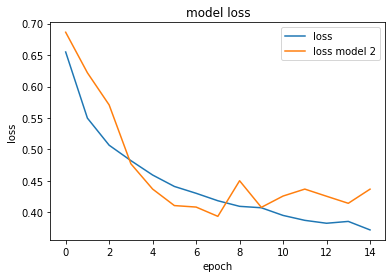

In [10]:
plt.plot(hist1.history['loss'])
plt.plot(hist2.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss','loss model 2'], loc='upper right')
plt.show()

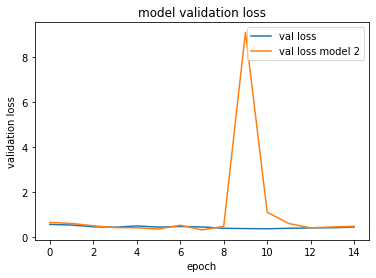

In [11]:
plt.plot(hist1.history['val_loss'])
plt.plot(hist2.history['val_loss'])
plt.title('model validation loss')
plt.ylabel('validation loss')
plt.xlabel('epoch')
plt.legend(['val loss', 'val loss model 2'], loc='upper right')
plt.show()

# BEST CONV NUMBER

In [6]:
epochs_numb = 15

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(image_height, image_width, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.50))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

hist1 = model.fit(
        train_generator,
        epochs=epochs_numb,
        validation_data=validation_generator)

Epoch 1/15
545/545 [==============================] - 159s 283ms/step - loss: 0.7022 - accuracy: 0.6190 - val_loss: 0.5478 - val_accuracy: 0.7205
Epoch 2/15
545/545 [==============================] - 126s 230ms/step - loss: 0.5512 - accuracy: 0.7302 - val_loss: 0.4971 - val_accuracy: 0.7563
Epoch 3/15
545/545 [==============================] - 126s 232ms/step - loss: 0.5043 - accuracy: 0.7622 - val_loss: 0.5002 - val_accuracy: 0.7829
Epoch 4/15
545/545 [==============================] - 126s 231ms/step - loss: 0.4748 - accuracy: 0.7787 - val_loss: 0.4339 - val_accuracy: 0.8054
Epoch 5/15
545/545 [==============================] - 132s 242ms/step - loss: 0.4599 - accuracy: 0.7953 - val_loss: 0.4769 - val_accuracy: 0.7737
Epoch 6/15
545/545 [==============================] - 127s 234ms/step - loss: 0.4525 - accuracy: 0.7994 - val_loss: 0.4583 - val_accuracy: 0.7848
Epoch 7/15
545/545 [==============================] - 128s 235ms/step - loss: 0.4442 - accuracy: 0.8029 - val_loss: 0.4464 -

In [7]:
epochs_numb = 15

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(image_height, image_width, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.50))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

hist2 = model.fit(
        train_generator,
        epochs=epochs_numb,
        validation_data=validation_generator)

Epoch 1/15
545/545 [==============================] - 128s 235ms/step - loss: 0.6666 - accuracy: 0.6046 - val_loss: 0.5880 - val_accuracy: 0.6778
Epoch 2/15
545/545 [==============================] - 128s 234ms/step - loss: 0.5593 - accuracy: 0.7242 - val_loss: 0.4937 - val_accuracy: 0.7692
Epoch 3/15
545/545 [==============================] - 127s 233ms/step - loss: 0.5003 - accuracy: 0.7697 - val_loss: 0.4192 - val_accuracy: 0.8155
Epoch 4/15
545/545 [==============================] - 128s 235ms/step - loss: 0.4564 - accuracy: 0.7995 - val_loss: 0.4210 - val_accuracy: 0.8201
Epoch 5/15
545/545 [==============================] - 128s 234ms/step - loss: 0.4224 - accuracy: 0.8173 - val_loss: 0.4053 - val_accuracy: 0.8394
Epoch 6/15
545/545 [==============================] - 127s 234ms/step - loss: 0.3999 - accuracy: 0.8307 - val_loss: 0.3868 - val_accuracy: 0.8463
Epoch 7/15
545/545 [==============================] - 128s 235ms/step - loss: 0.3727 - accuracy: 0.8441 - val_loss: 0.3296 -

In [8]:
epochs_numb = 15

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(image_height, image_width, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(512, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.50))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

hist3 = model.fit(
        train_generator,
        epochs=epochs_numb,
        validation_data=validation_generator)

Epoch 1/15
545/545 [==============================] - 212s 388ms/step - loss: 0.6687 - accuracy: 0.5970 - val_loss: 0.5693 - val_accuracy: 0.7150
Epoch 2/15
545/545 [==============================] - 127s 233ms/step - loss: 0.5467 - accuracy: 0.7314 - val_loss: 0.4780 - val_accuracy: 0.7765
Epoch 3/15
545/545 [==============================] - 128s 234ms/step - loss: 0.4644 - accuracy: 0.7905 - val_loss: 0.4187 - val_accuracy: 0.8091
Epoch 4/15
545/545 [==============================] - 128s 234ms/step - loss: 0.4117 - accuracy: 0.8237 - val_loss: 0.4759 - val_accuracy: 0.7375
Epoch 5/15
545/545 [==============================] - 128s 234ms/step - loss: 0.3720 - accuracy: 0.8442 - val_loss: 0.3061 - val_accuracy: 0.8756
Epoch 6/15
545/545 [==============================] - 128s 235ms/step - loss: 0.3379 - accuracy: 0.8599 - val_loss: 0.2942 - val_accuracy: 0.8743
Epoch 7/15
545/545 [==============================] - 127s 234ms/step - loss: 0.3175 - accuracy: 0.8714 - val_loss: 0.2884 -

In [13]:
epochs_numb = 15

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(image_height, image_width, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(512, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(1024, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.50))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

hist4 = model.fit(
        train_generator,
        epochs=epochs_numb,
        validation_data=validation_generator)

Epoch 1/15
545/545 [==============================] - 129s 234ms/step - loss: 0.6997 - accuracy: 0.5246 - val_loss: 0.6725 - val_accuracy: 0.5700
Epoch 2/15
545/545 [==============================] - 130s 238ms/step - loss: 0.6388 - accuracy: 0.6477 - val_loss: 0.5531 - val_accuracy: 0.7178
Epoch 3/15
545/545 [==============================] - 128s 235ms/step - loss: 0.5656 - accuracy: 0.7231 - val_loss: 0.5215 - val_accuracy: 0.7595
Epoch 4/15
545/545 [==============================] - 129s 236ms/step - loss: 0.4956 - accuracy: 0.7691 - val_loss: 0.4043 - val_accuracy: 0.8192
Epoch 5/15
545/545 [==============================] - 128s 234ms/step - loss: 0.4348 - accuracy: 0.8057 - val_loss: 0.4021 - val_accuracy: 0.8224
Epoch 6/15
545/545 [==============================] - 128s 235ms/step - loss: 0.3814 - accuracy: 0.8351 - val_loss: 0.4526 - val_accuracy: 0.8224
Epoch 7/15
545/545 [==============================] - 127s 233ms/step - loss: 0.3617 - accuracy: 0.8494 - val_loss: 0.2953 -

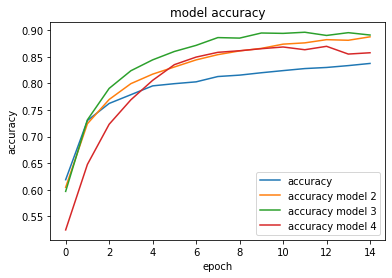

In [14]:
import matplotlib.pyplot as plt
plt.plot(hist1.history['accuracy'])
plt.plot(hist2.history['accuracy'])
plt.plot(hist3.history['accuracy'])
plt.plot(hist4.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'accuracy model 2', 'accuracy model 3', 'accuracy model 4'], loc='lower right')
plt.show()

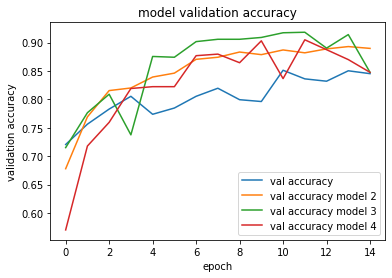

In [15]:
plt.plot(hist1.history['val_accuracy'])
plt.plot(hist2.history['val_accuracy'])
plt.plot(hist3.history['val_accuracy'])
plt.plot(hist4.history['val_accuracy'])
plt.title('model validation accuracy')
plt.ylabel('validation accuracy')
plt.xlabel('epoch')
plt.legend(['val accuracy', 'val accuracy model 2', 'val accuracy model 3', 'val accuracy model 4'], loc='lower right')
plt.show()

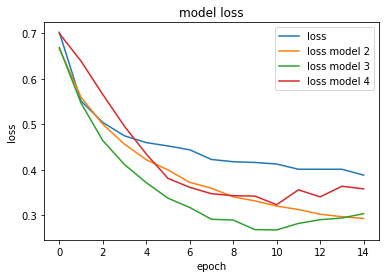

In [16]:
plt.plot(hist1.history['loss'])
plt.plot(hist2.history['loss'])
plt.plot(hist3.history['loss'])
plt.plot(hist4.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss','loss model 2','loss model 3','loss model 4'], loc='upper right')
plt.show()

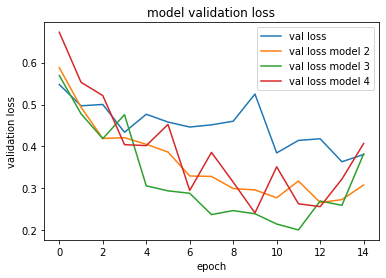

In [17]:
plt.plot(hist1.history['val_loss'])
plt.plot(hist2.history['val_loss'])
plt.plot(hist3.history['val_loss'])
plt.plot(hist4.history['val_loss'])
plt.title('model validation loss')
plt.ylabel('validation loss')
plt.xlabel('epoch')
plt.legend(['val loss', 'val loss model 2', 'val loss model 3','val loss model 4'], loc='upper right')
plt.show()

# DROPOUT LAYER

In [6]:
epochs_numb = 15

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(image_height, image_width, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.45))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.40))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.35))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.30))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

hist1 = model.fit(
        train_generator,
        epochs=epochs_numb,
        validation_data=validation_generator)

Epoch 1/15
545/545 [==============================] - 227s 410ms/step - loss: 0.6983 - accuracy: 0.5930 - val_loss: 0.6283 - val_accuracy: 0.6457
Epoch 2/15
545/545 [==============================] - 175s 321ms/step - loss: 0.5994 - accuracy: 0.6825 - val_loss: 0.5631 - val_accuracy: 0.6966
Epoch 3/15
545/545 [==============================] - 176s 323ms/step - loss: 0.5503 - accuracy: 0.7217 - val_loss: 0.5427 - val_accuracy: 0.7265
Epoch 4/15
545/545 [==============================] - 175s 321ms/step - loss: 0.5214 - accuracy: 0.7488 - val_loss: 0.4562 - val_accuracy: 0.7926
Epoch 5/15
545/545 [==============================] - 175s 320ms/step - loss: 0.4962 - accuracy: 0.7654 - val_loss: 0.4292 - val_accuracy: 0.7994
Epoch 6/15
545/545 [==============================] - 174s 320ms/step - loss: 0.4835 - accuracy: 0.7768 - val_loss: 0.4203 - val_accuracy: 0.8059
Epoch 7/15
545/545 [==============================] - 176s 323ms/step - loss: 0.4607 - accuracy: 0.7912 - val_loss: 0.4281 -

In [7]:
epochs_numb = 15

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(image_height, image_width, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

hist2 = model.fit(
        train_generator,
        epochs=epochs_numb,
        validation_data=validation_generator)

Epoch 1/15
545/545 [==============================] - 177s 322ms/step - loss: 0.8238 - accuracy: 0.5827 - val_loss: 0.6371 - val_accuracy: 0.6278
Epoch 2/15
545/545 [==============================] - 172s 316ms/step - loss: 0.6013 - accuracy: 0.6806 - val_loss: 0.5469 - val_accuracy: 0.6994
Epoch 3/15
545/545 [==============================] - 172s 315ms/step - loss: 0.5460 - accuracy: 0.7255 - val_loss: 0.5833 - val_accuracy: 0.6898
Epoch 4/15
545/545 [==============================] - 172s 316ms/step - loss: 0.5057 - accuracy: 0.7578 - val_loss: 0.5281 - val_accuracy: 0.7604
Epoch 5/15
545/545 [==============================] - 171s 313ms/step - loss: 0.4789 - accuracy: 0.7762 - val_loss: 0.4160 - val_accuracy: 0.8206
Epoch 6/15
545/545 [==============================] - 170s 312ms/step - loss: 0.4507 - accuracy: 0.7929 - val_loss: 0.4645 - val_accuracy: 0.8027
Epoch 7/15
545/545 [==============================] - 172s 315ms/step - loss: 0.4388 - accuracy: 0.8028 - val_loss: 0.3824 -

In [8]:
epochs_numb = 15

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(image_height, image_width, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.30))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.35))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.40))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.45))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.50))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

hist3 = model.fit(
        train_generator,
        epochs=epochs_numb,
        validation_data=validation_generator)

Epoch 1/15
545/545 [==============================] - 173s 316ms/step - loss: 0.6711 - accuracy: 0.5821 - val_loss: 0.6198 - val_accuracy: 0.6778
Epoch 2/15
545/545 [==============================] - 175s 321ms/step - loss: 0.5967 - accuracy: 0.6885 - val_loss: 0.5623 - val_accuracy: 0.6934
Epoch 3/15
545/545 [==============================] - 171s 314ms/step - loss: 0.5498 - accuracy: 0.7271 - val_loss: 0.4842 - val_accuracy: 0.7793
Epoch 4/15
545/545 [==============================] - 173s 318ms/step - loss: 0.5124 - accuracy: 0.7567 - val_loss: 0.4939 - val_accuracy: 0.7563
Epoch 5/15
545/545 [==============================] - 173s 317ms/step - loss: 0.4827 - accuracy: 0.7757 - val_loss: 0.4083 - val_accuracy: 0.8302
Epoch 6/15
545/545 [==============================] - 172s 315ms/step - loss: 0.4571 - accuracy: 0.7976 - val_loss: 0.4202 - val_accuracy: 0.8054
Epoch 7/15
545/545 [==============================] - 171s 313ms/step - loss: 0.4399 - accuracy: 0.8029 - val_loss: 0.4028 -

In [10]:
epochs_numb = 15

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(image_height, image_width, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

hist4= model.fit(
        train_generator,
        epochs=epochs_numb,
        validation_data=validation_generator)

Epoch 1/15
545/545 [==============================] - 375s 687ms/step - loss: 0.6891 - accuracy: 0.5852 - val_loss: 0.5829 - val_accuracy: 0.7067
Epoch 2/15
545/545 [==============================] - 174s 320ms/step - loss: 0.6000 - accuracy: 0.6903 - val_loss: 0.5749 - val_accuracy: 0.6737
Epoch 3/15
545/545 [==============================] - 176s 324ms/step - loss: 0.5663 - accuracy: 0.7138 - val_loss: 0.5459 - val_accuracy: 0.7178
Epoch 4/15
545/545 [==============================] - 174s 320ms/step - loss: 0.5466 - accuracy: 0.7304 - val_loss: 0.5132 - val_accuracy: 0.7503
Epoch 5/15
545/545 [==============================] - 175s 322ms/step - loss: 0.5054 - accuracy: 0.7647 - val_loss: 0.4386 - val_accuracy: 0.8027
Epoch 6/15
545/545 [==============================] - 174s 320ms/step - loss: 0.4714 - accuracy: 0.7914 - val_loss: 0.3870 - val_accuracy: 0.8385
Epoch 7/15
545/545 [==============================] - 173s 318ms/step - loss: 0.4428 - accuracy: 0.8050 - val_loss: 0.4178 -

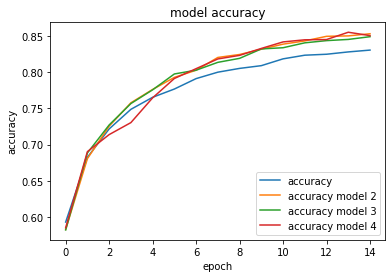

In [11]:
import matplotlib.pyplot as plt
plt.plot(hist1.history['accuracy'])
plt.plot(hist2.history['accuracy'])
plt.plot(hist3.history['accuracy'])
plt.plot(hist4.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'accuracy model 2', 'accuracy model 3', 'accuracy model 4'], loc='lower right')
plt.show()

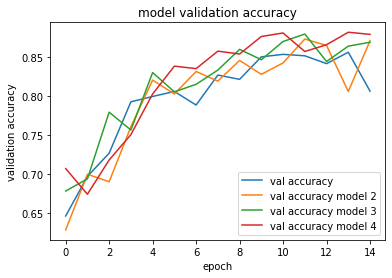

In [12]:
plt.plot(hist1.history['val_accuracy'])
plt.plot(hist2.history['val_accuracy'])
plt.plot(hist3.history['val_accuracy'])
plt.plot(hist4.history['val_accuracy'])
plt.title('model validation accuracy')
plt.ylabel('validation accuracy')
plt.xlabel('epoch')
plt.legend(['val accuracy', 'val accuracy model 2', 'val accuracy model 3', 'val accuracy model 4'], loc='lower right')
plt.show()

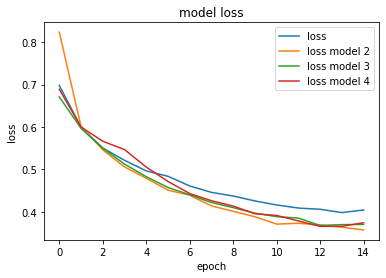

In [13]:
plt.plot(hist1.history['loss'])
plt.plot(hist2.history['loss'])
plt.plot(hist3.history['loss'])
plt.plot(hist4.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss','loss model 2','loss model 3','loss model 4'], loc='upper right')
plt.show()

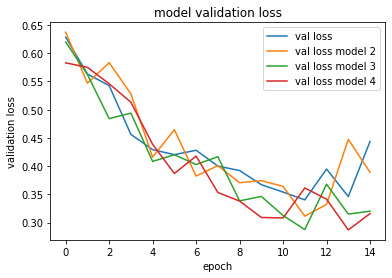

In [14]:
plt.plot(hist1.history['val_loss'])
plt.plot(hist2.history['val_loss'])
plt.plot(hist3.history['val_loss'])
plt.plot(hist4.history['val_loss'])
plt.title('model validation loss')
plt.ylabel('validation loss')
plt.xlabel('epoch')
plt.legend(['val loss', 'val loss model 2', 'val loss model 3','val loss model 4'], loc='upper right')
plt.show()

# BEST DENSE LAYER

In [6]:
epochs_numb = 15

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(image_height, image_width, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

hist1= model.fit(
        train_generator,
        epochs=epochs_numb,
        validation_data=validation_generator)

Epoch 1/15
545/545 [==============================] - 152s 272ms/step - loss: 0.6830 - accuracy: 0.5760 - val_loss: 0.5982 - val_accuracy: 0.6934
Epoch 2/15
545/545 [==============================] - 119s 218ms/step - loss: 0.5822 - accuracy: 0.7017 - val_loss: 0.4981 - val_accuracy: 0.7531
Epoch 3/15
545/545 [==============================] - 122s 223ms/step - loss: 0.5224 - accuracy: 0.7525 - val_loss: 0.4972 - val_accuracy: 0.7503
Epoch 4/15
545/545 [==============================] - 124s 228ms/step - loss: 0.4777 - accuracy: 0.7811 - val_loss: 0.4042 - val_accuracy: 0.8256
Epoch 5/15
545/545 [==============================] - 121s 223ms/step - loss: 0.4508 - accuracy: 0.8034 - val_loss: 0.4168 - val_accuracy: 0.8100
Epoch 6/15
545/545 [==============================] - 125s 229ms/step - loss: 0.4212 - accuracy: 0.8130 - val_loss: 0.3525 - val_accuracy: 0.8541
Epoch 7/15
545/545 [==============================] - 120s 221ms/step - loss: 0.4002 - accuracy: 0.8250 - val_loss: 0.3475 -

In [7]:
epochs_numb = 15

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(image_height, image_width, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

hist2= model.fit(
        train_generator,
        epochs=epochs_numb,
        validation_data=validation_generator)

Epoch 1/15
545/545 [==============================] - 121s 222ms/step - loss: 0.6851 - accuracy: 0.5796 - val_loss: 0.6497 - val_accuracy: 0.6292
Epoch 2/15
545/545 [==============================] - 123s 226ms/step - loss: 0.5933 - accuracy: 0.6942 - val_loss: 0.4916 - val_accuracy: 0.7646
Epoch 3/15
545/545 [==============================] - 119s 219ms/step - loss: 0.5234 - accuracy: 0.7461 - val_loss: 0.4529 - val_accuracy: 0.7889
Epoch 4/15
545/545 [==============================] - 122s 225ms/step - loss: 0.4820 - accuracy: 0.7755 - val_loss: 0.4126 - val_accuracy: 0.8164
Epoch 5/15
545/545 [==============================] - 119s 218ms/step - loss: 0.4472 - accuracy: 0.7983 - val_loss: 0.4119 - val_accuracy: 0.8109
Epoch 6/15
545/545 [==============================] - 120s 220ms/step - loss: 0.4203 - accuracy: 0.8152 - val_loss: 0.3990 - val_accuracy: 0.8219
Epoch 7/15
545/545 [==============================] - 120s 221ms/step - loss: 0.4018 - accuracy: 0.8231 - val_loss: 0.3783 -

In [8]:
epochs_numb = 15

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(image_height, image_width, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

hist3= model.fit(
        train_generator,
        epochs=epochs_numb,
        validation_data=validation_generator)

Epoch 1/15
545/545 [==============================] - 122s 223ms/step - loss: 0.6826 - accuracy: 0.5894 - val_loss: 0.5303 - val_accuracy: 0.7182
Epoch 2/15
545/545 [==============================] - 121s 223ms/step - loss: 0.5532 - accuracy: 0.7230 - val_loss: 0.4682 - val_accuracy: 0.7724
Epoch 3/15
545/545 [==============================] - 121s 222ms/step - loss: 0.4894 - accuracy: 0.7679 - val_loss: 0.4440 - val_accuracy: 0.7958
Epoch 4/15
545/545 [==============================] - 124s 228ms/step - loss: 0.4498 - accuracy: 0.7961 - val_loss: 0.3889 - val_accuracy: 0.8270
Epoch 5/15
545/545 [==============================] - 123s 225ms/step - loss: 0.4165 - accuracy: 0.8142 - val_loss: 0.5466 - val_accuracy: 0.7724
Epoch 6/15
545/545 [==============================] - 121s 222ms/step - loss: 0.3936 - accuracy: 0.8253 - val_loss: 0.3604 - val_accuracy: 0.8463
Epoch 7/15
545/545 [==============================] - 118s 217ms/step - loss: 0.3739 - accuracy: 0.8386 - val_loss: 0.3368 -

In [9]:
epochs_numb = 15

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(image_height, image_width, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

hist4= model.fit(
        train_generator,
        epochs=epochs_numb,
        validation_data=validation_generator)

Epoch 1/15
545/545 [==============================] - 122s 222ms/step - loss: 0.7770 - accuracy: 0.5730 - val_loss: 0.6059 - val_accuracy: 0.6567
Epoch 2/15
545/545 [==============================] - 122s 223ms/step - loss: 0.5846 - accuracy: 0.6979 - val_loss: 0.4980 - val_accuracy: 0.7499
Epoch 3/15
545/545 [==============================] - 122s 223ms/step - loss: 0.5159 - accuracy: 0.7503 - val_loss: 0.4523 - val_accuracy: 0.7903
Epoch 4/15
545/545 [==============================] - 122s 224ms/step - loss: 0.4730 - accuracy: 0.7840 - val_loss: 0.5053 - val_accuracy: 0.7572
Epoch 5/15
545/545 [==============================] - 123s 225ms/step - loss: 0.4430 - accuracy: 0.7962 - val_loss: 0.4547 - val_accuracy: 0.7898
Epoch 6/15
545/545 [==============================] - 122s 224ms/step - loss: 0.4208 - accuracy: 0.8152 - val_loss: 0.3701 - val_accuracy: 0.8513
Epoch 7/15
545/545 [==============================] - 125s 230ms/step - loss: 0.3995 - accuracy: 0.8256 - val_loss: 0.4001 -

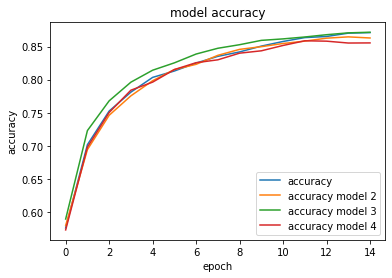

In [10]:
import matplotlib.pyplot as plt
plt.plot(hist1.history['accuracy'])
plt.plot(hist2.history['accuracy'])
plt.plot(hist3.history['accuracy'])
plt.plot(hist4.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'accuracy model 2', 'accuracy model 3', 'accuracy model 4'], loc='lower right')
plt.show()

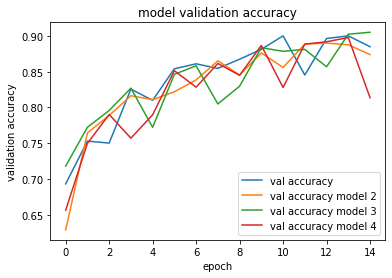

In [11]:
plt.plot(hist1.history['val_accuracy'])
plt.plot(hist2.history['val_accuracy'])
plt.plot(hist3.history['val_accuracy'])
plt.plot(hist4.history['val_accuracy'])
plt.title('model validation accuracy')
plt.ylabel('validation accuracy')
plt.xlabel('epoch')
plt.legend(['val accuracy', 'val accuracy model 2', 'val accuracy model 3', 'val accuracy model 4'], loc='lower right')
plt.show()

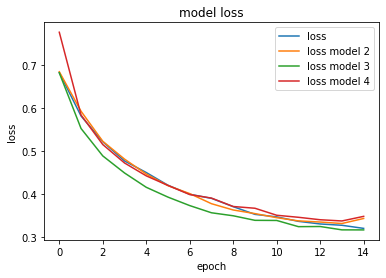

In [12]:
plt.plot(hist1.history['loss'])
plt.plot(hist2.history['loss'])
plt.plot(hist3.history['loss'])
plt.plot(hist4.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss','loss model 2','loss model 3','loss model 4'], loc='upper right')
plt.show()

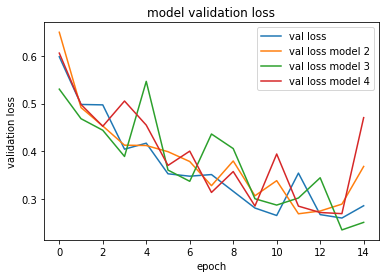

In [13]:
plt.plot(hist1.history['val_loss'])
plt.plot(hist2.history['val_loss'])
plt.plot(hist3.history['val_loss'])
plt.plot(hist4.history['val_loss'])
plt.title('model validation loss')
plt.ylabel('validation loss')
plt.xlabel('epoch')
plt.legend(['val loss', 'val loss model 2', 'val loss model 3','val loss model 4'], loc='upper right')
plt.show()

# BEST MODEL

In [9]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)
delta_improv = EarlyStopping(monitor='loss',  min_delta=0.005, patience=5)
checkpoint_filepath = './tmp/checkpoint'
model_checkpoint_callback = ModelCheckpoint(filepath=checkpoint_filepath, save_weights_only=True, monitor='val_accuracy', mode='max', save_best_only=True)

In [7]:
epochs_numb = 300

model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(image_height, image_width, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(256,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.55))
model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.60))
model.add(Dense(64,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.65))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',
  optimizer='rmsprop',metrics=['accuracy'])

hist = model.fit(
        train_generator,
        epochs=epochs_numb,
        validation_data=validation_generator,
        callbacks=[reduce_lr,delta_improv,model_checkpoint_callback]
        )

model.save('model_best')

Epoch 1/300
545/545 [==============================] - 221s 395ms/step - loss: 0.8484 - accuracy: 0.5282 - val_loss: 1.1060 - val_accuracy: 0.5200 - lr: 0.0010
Epoch 2/300
545/545 [==============================] - 180s 330ms/step - loss: 0.6188 - accuracy: 0.6568 - val_loss: 0.5350 - val_accuracy: 0.7375 - lr: 0.0010
Epoch 3/300
545/545 [==============================] - 182s 334ms/step - loss: 0.4900 - accuracy: 0.7686 - val_loss: 0.4195 - val_accuracy: 0.8137 - lr: 0.0010
Epoch 4/300
545/545 [==============================] - 183s 335ms/step - loss: 0.4064 - accuracy: 0.8157 - val_loss: 0.3599 - val_accuracy: 0.8380 - lr: 0.0010
Epoch 5/300
545/545 [==============================] - 183s 336ms/step - loss: 0.3444 - accuracy: 0.8509 - val_loss: 0.3505 - val_accuracy: 0.8568 - lr: 0.0010
Epoch 6/300
545/545 [==============================] - 181s 333ms/step - loss: 0.3022 - accuracy: 0.8724 - val_loss: 0.3255 - val_accuracy: 0.8568 - lr: 0.0010
Epoch 7/300
545/545 [===================

INFO:tensorflow:Assets written to: model_best/assets


INFO:tensorflow:Assets written to: model_best/assets


In [8]:
model.evaluate(test_generator)

69/69 [==============================] - 14s 201ms/step - loss: 0.1110 - accuracy: 0.9569


[0.11104366928339005, 0.9569004774093628]

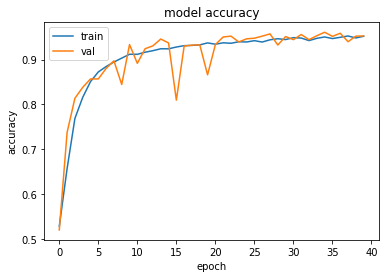

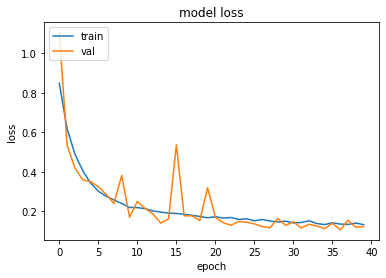

In [12]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

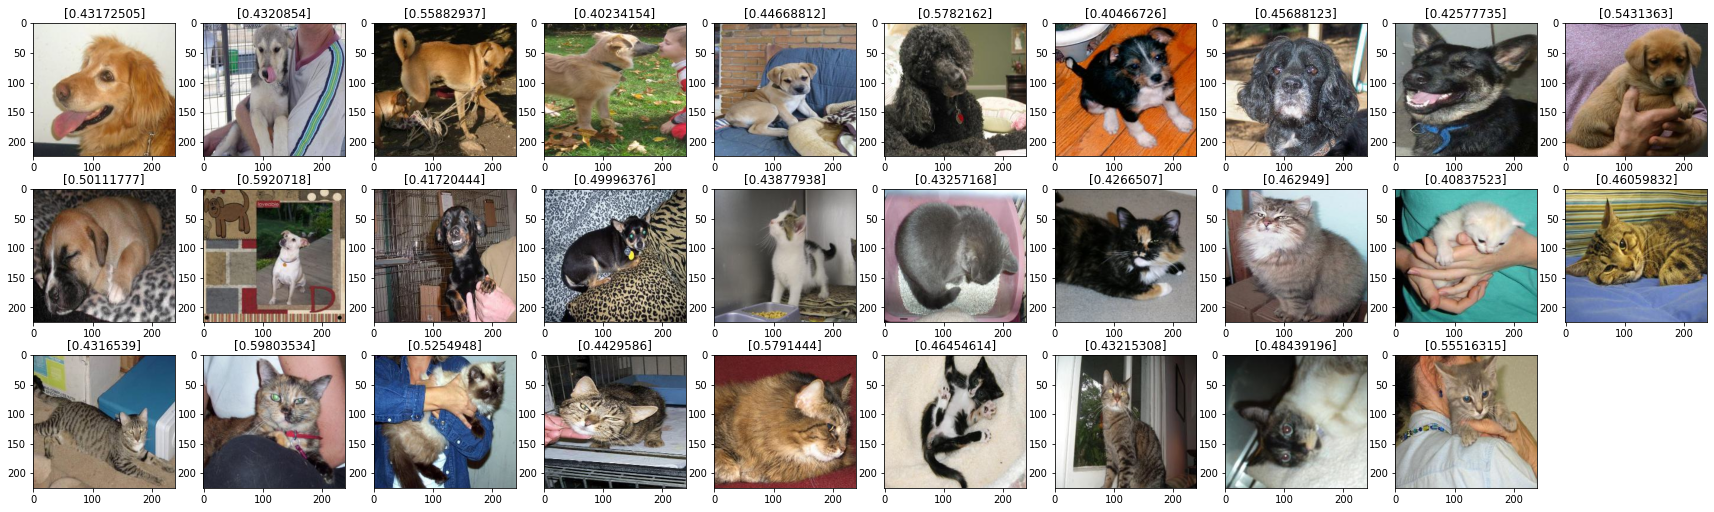

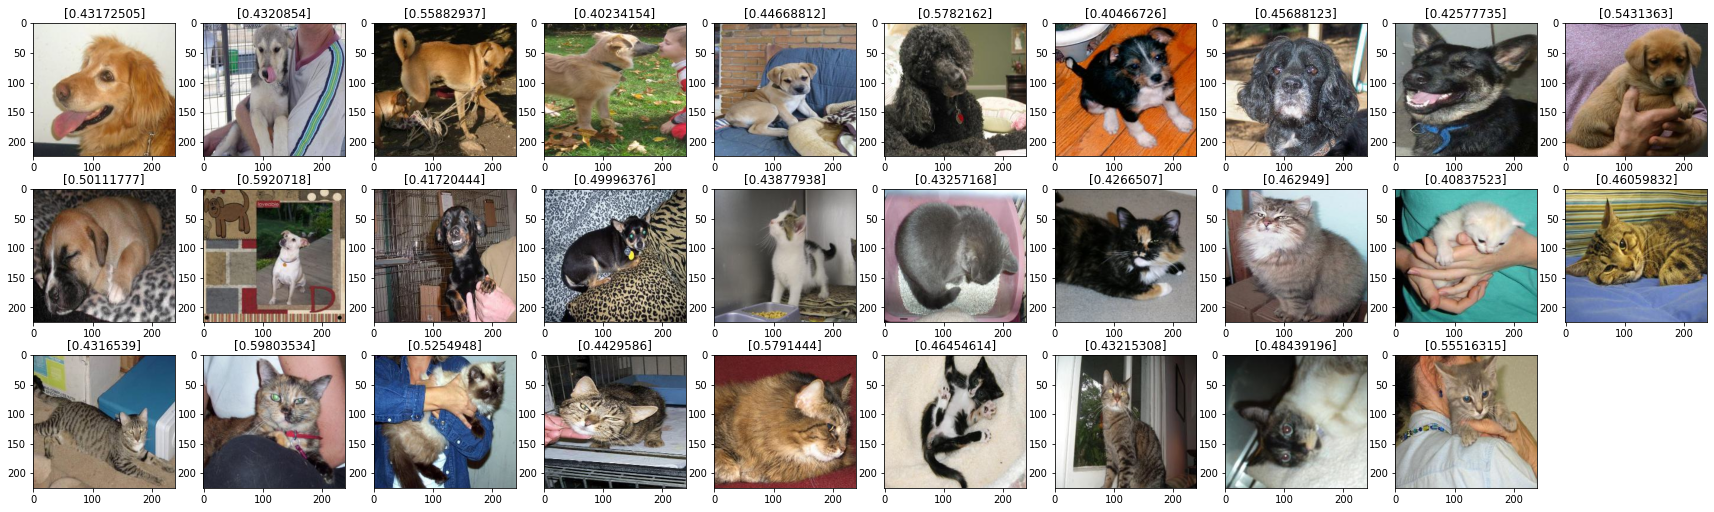

In [17]:
import os
fig = plt.figure(figsize=(30,30))
rows = 10
columns = 10
index = 1
base_path = 'NN_data/test/' 
for dir in os.listdir(base_path):
  i = 0
  for img in os.listdir(base_path + dir):
    img_open = Image.open(base_path + dir + '/' + img)
    img_to_array = np.array(img_open)
    img_reshaped = np.expand_dims(img_to_array, axis = 0)
    res = model.predict(img_reshaped, verbose=0)
    if res[0] < 0.60 and res[0] > 0.40:
      fig.add_subplot(rows, columns, index)
      plt.imshow(img_to_array)
      plt.title(res[0])
      index += 1
fig

# 5-FOLD VALIDATION

In [6]:
image_height = 225
image_width = 240
def get_model():
    model=Sequential()
    model.add(Conv2D(32,(3,3),activation='relu',input_shape=(image_height, image_width, 3)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.1))
    
    model.add(Conv2D(64,(3,3),activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.2))
    
    model.add(Conv2D(128,(3,3),activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))
    
    model.add(Conv2D(256,(3,3),activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.4))
    
    model.add(Conv2D(512,(3,3),activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.5))
    
    model.add(Flatten())
    model.add(Dense(256,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.55))
    model.add(Dense(128,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.60))
    model.add(Dense(64,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.65))
    model.add(Dense(1,activation='sigmoid'))
    return model

In [8]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)
delta_improv = EarlyStopping(monitor='loss',  min_delta=0.005, patience=5)
checkpoint_filepath = './tmp/checkpoint'
model_checkpoint_callback = ModelCheckpoint(filepath=checkpoint_filepath, save_weights_only=True, monitor='val_accuracy', mode='max', save_best_only=True)

base_dir = './CatsDogs_resized'
images = []
true_labels = []
for dirs in os.listdir(base_dir):
    for img in os.listdir('/'.join([base_dir, dirs])):
        images.append('/'.join([base_dir,dirs,img]))
        true_labels.append(dirs.split('_')[0])
df = pd.DataFrame({'Name' : images, 'True Labels': true_labels})



def get_model_name(k):
    return 'model_best_final_'+str(k)+'.h5'

def my_loss_fn(y_true, y_pred):
    casted = tf.subtract(y_true, y_pred)
    squared = tf.square(casted)
    return squared

image_height = 225
image_width = 240

n=5
num_epochs=10

Y = df[['True Labels']]

kf = KFold(n_splits = n)

idg = ImageDataGenerator(width_shift_range=0.1,
                         height_shift_range=0.1,
                         zoom_range=0.3,
                         fill_mode='nearest',
                         horizontal_flip = True,
                         rescale=1./255)

test_acc = []
test_loss = []

df = df.sample(frac = 1)

save_dir = './saved_models_best/'
fold_var = 1

for train_index, val_index in kf.split(np.zeros(len(Y)),Y):
    training_data = df.iloc[train_index]
    validation_data = df.iloc[val_index]

    train_data_generator = idg.flow_from_dataframe(training_data,
                                                   x_col = "Name", y_col = "True Labels",
                                                   target_size=(image_height,image_width),
                                                   class_mode = "binary", shuffle = True)
    valid_data_generator  = idg.flow_from_dataframe(validation_data,
                                                    x_col = "Name", y_col = "True Labels",
                                                    target_size=(image_height,image_width),
                                                    class_mode = "binary", shuffle = True)
    model = get_model()
    model.compile(loss=my_loss_fn,optimizer='rmsprop',metrics=['accuracy'])
    checkpoint = ModelCheckpoint(save_dir+get_model_name(fold_var),
                                                    monitor='val_accuracy', verbose=1,
                                                    save_best_only=True, mode='max')
    callbacks_list = [checkpoint,reduce_lr,delta_improv,model_checkpoint_callback]
    history = model.fit(train_data_generator,
                        epochs=num_epochs,
                        callbacks=callbacks_list,
                        validation_data=valid_data_generator)
    results = model.evaluate(valid_data_generator)
    results = dict(zip(model.metrics_names,results))

    test_acc.append(results['accuracy'])
    test_loss.append(results['loss'])

    tf.keras.backend.clear_session()

    fold_var += 1
    
print(np.mean(test_acc))
print(np.mean(test_loss))

Found 17435 validated image filenames belonging to 2 classes.
Found 4359 validated image filenames belonging to 2 classes.
Epoch 1/10
545/545 [==============================] - ETA: 0s - loss: 0.3139 - accuracy: 0.5206
Epoch 1: val_accuracy improved from -inf to 0.51181, saving model to ./saved_models_best/model_best_final_1.h5
545/545 [==============================] - 256s 466ms/step - loss: 0.3139 - accuracy: 0.5206 - val_loss: 0.2516 - val_accuracy: 0.5118 - lr: 0.0010
Epoch 2/10
545/545 [==============================] - ETA: 0s - loss: 0.2439 - accuracy: 0.5963
Epoch 2: val_accuracy improved from 0.51181 to 0.63317, saving model to ./saved_models_best/model_best_final_1.h5
545/545 [==============================] - 259s 475ms/step - loss: 0.2439 - accuracy: 0.5963 - val_loss: 0.2246 - val_accuracy: 0.6332 - lr: 0.0010
Epoch 3/10
545/545 [==============================] - ETA: 0s - loss: 0.1910 - accuracy: 0.7101
Epoch 3: val_accuracy did not improve from 0.63317
545/545 [========

In [9]:
VALIDATION_LOSS

[0.0852087214589119,
 0.08964374661445618,
 0.1498616635799408,
 0.09831317514181137,
 0.08235490322113037]